
Written by Julie Ganeshan (MIT) \
Taught by Julie Ganeshan (MIT) and Nadiaa Chepurko (MIT) \
Parts adapted from http://cs231n.github.io/python-numpy-tutorial/
(Numpy topics are inspired by this, Matplotlib section is taken verbatim)

# Contents

Note: this tutorial is geared towards students **experienced in Python, and general programming** and aims to introduce you to some of the libraries we use in computer vision, and other compute intensive tasks.

Table of Contents
- [Numpy (Numerical Python)](#Numpy)
    - Arrays, Matrices, and Tensors - the *ndarray*
    - Indexing into arrays
    - Elementwise, Matrix math and Broadcasting
    - Other operators
    
- [Matplotlib (Plotting and Visualization)](#Matplotlib)
    - Basic plots
    - Figures
    
- [OpenCV (Computer Vision)](#OpenCV)
    - Reading images
    - Channels, Image Formats, and using images as arrays
    - Showing images
    - Basic image operations - Resize, Color, and more
    - Working with Video

# Initilization

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
expected_name = "PythonTutorial.ipynb"

# Colab specific setup
try:
  from google.colab import drive
  
except Exception:
  # Local setup
  rootpath = "."

else:
  drive.mount('/content/gdrive', force_remount=True)
  print("This will take a while, depending on how many folders you have in your google drive (your drive has to be mounted into the machine)")
  rootpath = None
  for (parent_dir, subfolders, subfiles) in os.walk('/content/gdrive'):
    if expected_name in subfiles:
      print("Found this file! Setting root path to: %s" % parent_dir)
      rootpath = parent_dir
  if rootpath is None:
    raise Exception("Could not find this notebook (%s). Did you change the name? If so, change expected_name variable" % expected_name)
    

Mounted at /content/gdrive
This will take a while, depending on how many folders you have in your google drive (your drive has to be mounted into the machine)
Found this file! Setting root path to: /content/gdrive/MyDrive/American_University/2021_Spring/CSC-676-001 Computer Vision/GitHub/Colab Notebooks


KeyboardInterrupt: ignored

# Numpy

Numpy is a numerical library that provides **_tons_** of useful functions for scalar, array, and matrix types. We'll only go into a small scratch of numpy.

**Why numpy instead of regular `for` loops**? \
In addition to the convenience of not redesigning the wheel, much of Numpy is built directly in C++ and is well optimized, so it runs *very* fast

Let's import numpy now! It is customary to call it `np`, since you need to reference it a lot.

In [12]:
import numpy as np

## Arrays, Matrices, and Tensors

One of the most important primitives in numpy is the `np.array` - this represents a fixed-size array (or list) of elements.

Unlike Python lists, numpy arrays **MUST HAVE THE SAME TYPE**. The types allowed by numpy are below. Note that you have greater control over how much space is used by each datatype than Python primitives:
- float16, float32, float64 (decimal values)
- int8, int16, int32, int64 (integers)
- uint8, uint16, uint32, uint64 (unsigned, or positive, integers)
- bool (boolean)
- complex64, complex128 (Complex numbers, represented as 2 floats)

All of these types have a default size that you can access with `np.float`, `np.int`, and so on.

Let's make an array from a Python list!

In [14]:
a = np.array([1, 2, 3])
b = np.array([10, 20, 30])
print("A is %s. B is %s" % (repr(a), repr(b)))
print("Object Type:",type(a))

A is array([1, 2, 3]). B is array([10, 20, 30])
Object Type: <class 'numpy.ndarray'>


Let's see what type numpy inferred from our data

In [15]:
a.dtype

dtype('int64')

You can get a casted version of an array using the function `astype`

In [16]:
a.astype(np.complex)

array([1.+0.j, 2.+0.j, 3.+0.j])

We can access elements of an array using the same `[]` notation we're used to. We can even use negatives to index from the end, and make slices.

In [18]:
print(a[0])
print(b[-1])
print(repr(a[0:3:2]))

3
30
array([1, 3])


Since arrays have a fixed size, we can get this size as a tuple using the `shape` attribute - you can't set this though!

In [19]:
print(a.shape)
print(b.shape)

(3,)
(3,)


We can also change elements of the array - we just can't add new elements

In [ ]:
a[0] = 100
print(repr(a))

array([100,   2,   3])


Since `a` and `b` are numpy arrays, we can do math with them now! These operations, by default, will happen out-of-place (a new array will be created to store the result)

In [ ]:
print("Numpy math:")
print(a,"+",b,"=",a + b)

# If they weren't numpy arrays
print("\nVanilla Python List math:")
print(list(a),"+",list(b),"=",list(a) + list(b))

Numpy math:
[1 2 3] + [10 20 30] = [11 22 33]

Vanilla Python List math:
[1, 2, 3] + [10, 20, 30] = [1, 2, 3, 10, 20, 30]


This is a small example, but we'll soon see more complicated operations numpy arrays can perform!

### Adding Dimensions
We can also make matrices, by simply giving the constructor the correct shape of data

In [20]:
my_matrix = np.array(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)
print(repr(my_matrix))

array([[1, 2, 3],
       [4, 5, 6]])


Now, using shape will be more helpful - note that you couldn't get this shape with a Python list!

In [21]:
print(my_matrix.shape)

(2, 3)


We can access matrix elements using each of their indices in order. (All dimensions are 0-indexed)

In [22]:
print(my_matrix[0,1]) # Get row 0, column 2. The order of these indices matches their respective maximums in shape.

2


We can still use slices, and negative indexing. Slicing a row or column from a matrix gives us a 1d array!

In [28]:
# Get row 0, all columns except the last one
print(repr(my_matrix[0,:-1]))

# Get columns 1 and 2.
print(repr(my_matrix[:, 1:3]))

array([1, 2])
array([[2, 3],
       [5, 6]])


We can also still index into this as an outer-array

In [ ]:
# Gets the 0th element of the outer array - that's the 0th row!
print(repr(my_matrix[0]))

array([1, 2, 3])


**NOTE:** Matrices in numpy MUST be rectangular. Unlike nested Python lists, which can have the first list contain 1 element, and the second list contain 3 elements, in a numpy matrix, all rows have to have the same length. In other words, the matrix cannot be "jagged"

Matrices, and other multi-dimensional arrays, are stored in "row-major" format - that is, elements of a row are stored next to each other. 

So, in this way, we can think of a multidimensional matrix as a single contiguous array, where shapes are just a human abstraction. Let's get this matrix as a 1d array.

In [29]:
print(my_matrix.ravel())

[1 2 3 4 5 6]


So, we can actually shape these 6 elements into whatever shape we want! This can be useful to create high dimensional arrays.

In [32]:
my_reshaped_matrix = my_matrix.reshape((3,2))
my_reshaped_matrix

array([[1, 2],
       [3, 4],
       [5, 6]])

Unless you explicitly use `np.copy`, Reshapes and slices create *views* of your data - that is, they all reference the same data! So, since the variables are all aliases to the same data, changes to one will reflect in all the others! This is a double-edged sword that can boost your performance, but might catch you off guard.

In [33]:
print("Original my_matrix")
print(repr(my_matrix))
print("Original my_reshaped_matrix")
print(repr(my_reshaped_matrix))

# Change an element
print("===MAKING A CHANGE===")
my_matrix[0,0] = 100 - my_matrix[0, 0]

print("New my_matrix")
print(repr(my_matrix))
print("New my_reshaped_matrix")
print(repr(my_reshaped_matrix))

Original my_matrix
array([[1, 2, 3],
       [4, 5, 6]])
Original my_reshaped_matrix
array([[1, 2],
       [3, 4],
       [5, 6]])
===MAKING A CHANGE===
New my_matrix
array([[99,  2,  3],
       [ 4,  5,  6]])
New my_reshaped_matrix
array([[99,  2],
       [ 3,  4],
       [ 5,  6]])


### Try it yourself!

You should now be able to do Exercise 1

### The third dimension and beyond

We were able to add a dimension to a 1d array to make a 2d matrix.
In fact, numpy can handle even more dimensions! 
In computer vision, we often will use 3 dimensions worth of data (Height x Width x 3 colors)

A "matrix" with 3 or more dimensions is called a *Tensor*.  
Let's make a 2 x 3 x 4 tensor (2 stacked 3x4 matrices)

In [41]:
my_tensor = np.array(range(2*3*4)).reshape(6,2,2)
print(my_tensor)

[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]

 [[12 13]
  [14 15]]

 [[16 17]
  [18 19]]

 [[20 21]
  [22 23]]]


We can use a tensor like any matrix or array

In [43]:
# Get the 0th matrix slice, the 1st row of that matrix, and the 2nd column of that row
print(my_tensor[0,1,2])

IndexError: ignored

### Array Creation
Numpy also provides several convenience functions to help you make make empty ndarrays

In [45]:
desired_shape = (2,3)

Some useful ones:
- zeros: Creates an array filled with zeros
- ones: An array of ones
- eye: The identity matrix I (needs 1 integer for square size)
- full: Fills with an element
- np.random.random: Random between 0 and 1
- np.random.randn: Random normal

In [49]:
print(repr(  np.zeros(desired_shape)          ),end="\n\n")
print(repr(  np.ones(desired_shape)           ),end="\n\n")
print(repr(  np.eye(3)                        ),end="\n\n")
print(repr(  np.full(desired_shape, 5)        ),end="\n\n")
print(repr(  np.random.random(desired_shape)  ),end="\n\n")

array([[0., 0., 0.],
       [0., 0., 0.]])

array([[1., 1., 1.],
       [1., 1., 1.]])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

array([[5, 5, 5],
       [5, 5, 5]])

array([[0.13652811, 0.82426832, 0.55728937],
       [0.529503  , 0.45340898, 0.78409796]])



They are float32's by default, but we can also choose the datatype of the created array

In [50]:
np.eye(3, dtype=np.int)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

## Array Indexing

We've already done a lot of indexing into arrays above, but let's look at some more details

In [51]:
my_tensor = np.array(range(2*3*4)).reshape(2,3,4).astype(np.int)
my_tensor

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

### Getting Elements
We can get elements by fully specifying the index

In [52]:
my_tensor[0,1,2]

6

If we partially specify the index (in order), since this is a list-of-lists, basically, we'll get "rows" (or matrices, if taking parts of a tensor

In [53]:
my_tensor[0]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [54]:
my_tensor[0, 0]

array([0, 1, 2, 3])

By this logic, we can also keep adding square brackets (get the matrix, then the row, then the column).

In [55]:
my_tensor[0][0]

array([0, 1, 2, 3])

We can also use standard slice notation. Again, we don't have to specify all the dimensions

In [ ]:
my_tensor[0, 0:2]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

### Setting elements

We can set elements that we index to

In [58]:
my_tensor[0, 0, 0] = 100
my_tensor

array([[[100,   1,   2,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11]],

       [[ 12,  13,  14,  15],
        [ 16,  17,  18,  19],
        [ 20,  21,  22,  23]]])

We can also set blocks / slices that we index into, as long as the shapes match!

In [ ]:
# Get the 0th matrix slice. Rows 1 and 2. Get every other column starting from 0
my_tensor[0,1:3,0::2]

array([[ 4,  6],
       [ 8, 10]])

In [60]:
replacement = (np.eye(2, dtype=np.int) + 2) * 100
replacement

array([[300, 200],
       [200, 300]])

In [61]:
my_tensor[0, 1:3, 0::2] = replacement
my_tensor

array([[[100,   1,   2,   3],
        [300,   5, 200,   7],
        [200,   9, 300,  11]],

       [[ 12,  13,  14,  15],
        [ 16,  17,  18,  19],
        [ 20,  21,  22,  23]]])

### Using Boolean and Integer Arrays as indices

What if we want some sort of permutation of the tensor, that's not easy to express in slice notation?

We can index into an array using an array of integers!

Let's test this out on a small array first.


In [62]:
my_array = np.array(range(5)) * 10 + 3
my_array

array([ 3, 13, 23, 33, 43])

In [ ]:
# We want the elements in this order
array_of_indices = np.array([4,1,3,0,2])
array_of_indices

array([4, 1, 3, 0, 2])

Let's index into our array with our index-array!

In [ ]:
my_array[array_of_indices]

array([43, 13, 33,  3, 23])

The shape of the output is determined by the index-array. We can use this to make complicated shapes, repeat elements, or exclude elements!

In [63]:
# Make a selector array
selector = (np.random.random((3,4)) * len(my_array)).astype(np.int)
selector

array([[2, 0, 2, 1],
       [0, 2, 4, 4],
       [4, 2, 4, 3]])

In [64]:
# Now, we can use these to get elements from our original array!
my_array[selector]

array([[23,  3, 23, 13],
       [ 3, 23, 43, 43],
       [43, 23, 43, 33]])

We can also use boolean arrays (masks) of the same size as the input, to get a part of the output!

In [65]:
my_mask = np.array([1, 0, 0, 1, 1], dtype=np.bool)
my_mask

array([ True, False, False,  True,  True])

In [66]:
print("Original")
print(repr(my_array))
print("Masked with",repr(my_mask))
print(repr(my_array[my_mask]))

Original
array([ 3, 13, 23, 33, 43])
Masked with array([ True, False, False,  True,  True])
array([ 3, 33, 43])


This is indexing - so we can also SET elements like this!

In [ ]:
print(repr(my_array))
replacement = np.array([600, 700, 800])
my_array[my_mask] = replacement
print(repr(my_array))

array([ 3, 13, 23, 33, 43])
array([600,  13,  23, 700, 800])


The `<` and `>` operators return masks - so you can use these to mask the original array, or even other arrays!

In [ ]:
my_array > 20

array([ True, False,  True,  True,  True])

In [ ]:
my_array[my_array > 20]

array([600,  23, 700, 800])

These concepts all hold in multiple dimensions as well

### Elementwise- and Matrix Math

Indexing and creating arrays is cool, but the real power of Numpy is doing math using those arrays.

The basic mathematical operators (+, -, /, \*, %) are treated as "elementwise" operators - they do something with each element. Which operands are used depends on a concept called "broadcasting". In practice - if you have two ndarrays of the same shape, then the operands will be corresponding elements in each ndarray. Otherwise, if possible, the smaller ndarray/scalar is repeated to be the same size as the larger array.

In [67]:
a = np.array(range(10)).reshape(2,5)
b = np.array(range(100,1100,100)).reshape(2,5)
print("a =",repr(  a  ))
print("b =",repr(  b  ))

a = array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])
b = array([[ 100,  200,  300,  400,  500],
       [ 600,  700,  800,  900, 1000]])


Operate on corresponding elements of a and b

In [ ]:
a + b

array([[ 100,  201,  302,  403,  504],
       [ 605,  706,  807,  908, 1009]])

In [ ]:
a * b

array([[   0,  200,  600, 1200, 2000],
       [3000, 4200, 5600, 7200, 9000]])

We can also use scalars as operands, which will be "broadcast" to every element.

In [ ]:
a * 2

array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18]])

In [ ]:
b % 3

array([[1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1]])

### Matrix Math

We can also do more complex math, that accounts for the shape of inputs. For example, matrix multiplication!

In [68]:
A = np.array( range(6) ). reshape((3,2))
B = np.array( range(10,16) ). reshape((2,3))

print("A =", repr(A))
print("B =", repr(B))

A = array([[0, 1],
       [2, 3],
       [4, 5]])
B = array([[10, 11, 12],
       [13, 14, 15]])


In [69]:
np.matmul(A, B)

array([[ 13,  14,  15],
       [ 59,  64,  69],
       [105, 114, 123]])

Here we have multiplied a (3 x 2) matrix by a (2 x 3) matrix to get a (3 x 3). We can get a different result by multiplying the other way. (Attempting an invalid multiplication

In [ ]:
np.matmul(B,A)

array([[ 70, 103],
       [ 88, 130]])

You can also use the `@` operator for matrix multiplication

In [ ]:
B @ A

array([[ 70, 103],
       [ 88, 130]])

Some other useful operations:
- Transpose: In fact, this is done so often there is a property `.T` of any matrix that computes the transpose
- Inverse: In the linalg submodule (`numpy.linalg.inv`)

Many other useful operators exist in numpy!


In [ ]:
# Some arbitrary matrix, maybe representing a system of equations
A = np.array([
    [3, 2, 1],
    [4, 8, 2],
    [1, 2, 3]
])
print("shape", A.shape)
print(repr(A))

shape (3, 3)
array([[3, 2, 1],
       [4, 8, 2],
       [1, 2, 3]])


In [ ]:
print("Transpose:\n", repr(A.T))

Transpose:
 array([[3, 4, 1],
       [2, 8, 2],
       [1, 2, 3]])


In [ ]:
A_inv = np.linalg.inv(A)
print("Inverse:", repr(A_inv), sep="\n")

Inverse:
array([[ 0.5 , -0.1 , -0.1 ],
       [-0.25,  0.2 , -0.05],
       [ 0.  , -0.1 ,  0.4 ]])


We expect that multiplying the inverse should yield the identity

In [ ]:
maybe_identity = np.matmul(A_inv, A)
maybe_identity

array([[ 1.00000000e+00, -2.77555756e-16, -8.32667268e-17],
       [ 4.16333634e-17,  1.00000000e+00,  1.38777878e-17],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

Since we're doing arithmetic with floats, we have small floating point errors. Let's use the elementwise `np.round`

In [ ]:
np.round(maybe_identity)

array([[ 1., -0., -0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

### Other Useful Functions

Other functions in Numpy that are useful:
- sum: Adds all elements of an ndarray, or sums along a given dimension ("axis")
- stack: joins two arrays in a new dimension
- concatenate: joins two arrays in an existing dimension

In [ ]:
A = np.array(range(10)).reshape(2,5)
A

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [ ]:
print("A's Shape is", A.shape)
col_sum = np.sum(A, axis = 0)
row_sum = np.sum(A, axis = 1)
total_sum = np.sum(A)
print("Row sums (shape: %s) - sum all values on axis 1 (along the column)" % str(row_sum.shape))
print(repr(row_sum))
print("Col sums (shape: %s) - sum all values on axis 0 (along the row)" % str(col_sum.shape))
print(repr(col_sum))
print("Full array sum (scalar)")
print(repr(total_sum))

A's Shape is (2, 5)
Row sums (shape: (2,)) - sum all values on axis 1 (along the column)
array([10, 35])
Col sums (shape: (5,)) - sum all values on axis 0 (along the row)
array([ 5,  7,  9, 11, 13])
Full array sum (scalar)
45


**Stacking Arrays**

In [ ]:
A = np.array((range(10))).reshape(2,5)
B = np.array((range(10,20))).reshape(2,5)
print("A=",repr(A),sep="\n")
print("B=",repr(B),sep="\n")

A=
array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])
B=
array([[10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])


Stack arrays on a new axis

In [ ]:
stacked = np.stack([A,B])
print("A shape: %s  ---  B shape: %s  ---  stacked shape: %s" % (A.shape, B.shape, stacked.shape))
stacked

A shape: (2, 5)  ---  B shape: (2, 5)  ---  stacked shape: (2, 2, 5)


array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]]])

**Concatenating arrays** \
Concatenate arrays along an existing axis 0 (change only axis 0, rest of shape should be same)

In [ ]:
catted = np.concatenate([A,B], axis=0)
print("A shape: %s  ---  B shape: %s  ---  catted shape (meow!): %s" % (A.shape, B.shape, catted.shape))
catted

A shape: (2, 5)  ---  B shape: (2, 5)  ---  catted shape (meow!): (4, 5)


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

### Try it yourself!

You should now be able to do Exercise 2

# Matplotlib

Matplotlib is a plotting library. `natplotlib.pyplot` exposes a stateful, easy to use, plotting system

In [70]:
import matplotlib
import matplotlib.pyplot as plt

### Plotting

Let's make a simple 2d plot

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4]


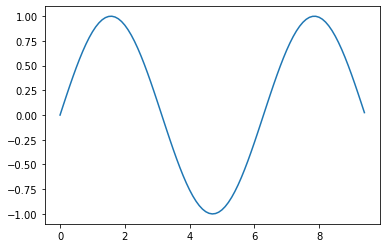

In [77]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)
print(x)

# Plot the points using matplotlib
plt.plot(x, y)
plt.show()

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

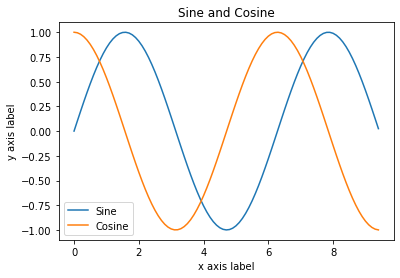

In [78]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

### Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

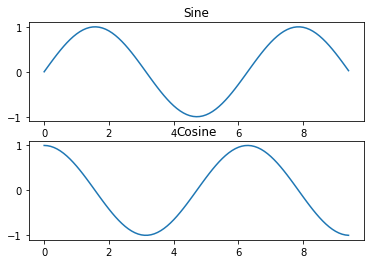

In [95]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

# OpenCV

OpenCV is an extremely popular computer vision library built in C++, with many powerful tools for CV. It lets you read, write, and show images and videos, read from webcam streams, find matching keypoints between two images, and more.

OpenCV is written in C++, however, there is a Python library that uses these optimized C++ libraries, and exposes an API using numpy arrays!

Let's import OpenCV

In [96]:
import cv2

## Reading, Writing, and Showing Images

### Reading

You can use the `imread` function to read in an image from a filepath.

In [100]:
phoenix_image = cv2.imread(os.path.join(rootpath, "data","phoenix.jpg"))

Images in OpenCV are represented as numpy arrays!

In [101]:
type(phoenix_image), phoenix_image.shape, phoenix_image.dtype

AttributeError: ignored

### Channels, Image Formats, and using images as arrays
The shape of a color image is (height, width, colors BGR) \
While it may seem strange that the height is first, it's because OpenCV treats images as "Rows" and "Columns" of an image. The "height" of an image is the number of rows!

In [93]:
phoenix_image.shape

AttributeError: ignored

You can see each pixel is represented by 3 values (uint8 means they are between 0 and 255)

In [ ]:
phoenix_image[0,0] # Get the pixel located at (0,0) from the top left

array([0, 0, 0], dtype=uint8)

Color images consist of "channels" - each color we can render is some combination of red, green, and blue (OR, in the case of a grayscale image, gray).

There are other sets of channels - you'll learn about these in the Color lecture!

By default, color images are opened by OpenCV as BGR, meaning the values for a given pixel are ordered "blue, green, red".

We can use the `cv2.cvtColor` function to change which color system our image is in. This will appear shortly.

In [102]:
phoenix_image_rgb = cv2.cvtColor(phoenix_image, cv2.COLOR_BGR2RGB)

error: ignored

### Showing the image 

If you're running scripted Python (not Jupyter notebook) The `imshow` command will display an image. However, this doesn't work in jupyter notebook, so we'll use Matplotlib's `imshow` instead

In [104]:
# This line only works if you're running locally
# cv2.imshow('test', phoenix_image)

Matplotlib assumes images are in the **RGB** format. OpenCV assumes that images are in the **BGR** format. So, we'll convert colors before showing the image. Let's make a function to do this.

In [105]:
def imshow(image, *args, **kwargs):
    if len(image.shape) == 3:
      # Height, width, channels
      # Assume BGR, do a conversion since 
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
      # Height, width - must be grayscale
      # convert to RGB, since matplotlib will plot in a weird colormap (instead of black = 0, white = 1)
      image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    # Draw the image
    plt.imshow(image, *args, **kwargs)
    # We'll also disable drawing the axes and tick marks in the plot, since it's actually an image
    plt.axis('off')
    # Make sure it outputs
    plt.show()

Let's show the image!

In [106]:
imshow(phoenix_image)

AttributeError: ignored

### Manipulating images

#### Changing color spaces

OpenCV exposes several functions to work with images. Let's use the `cvtColor` function to convert the color image to gray. Grayscale images do not have a third dimension, instead, each pixel has a luminosity ("whiteness") value between 0 and 255

Created BW image of shape (1280, 720)


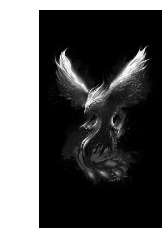

In [ ]:
phoenix_gray = cv2.cvtColor(phoenix_image, cv2.COLOR_BGR2GRAY)

print("Created BW image of shape",phoenix_gray.shape)
imshow(phoenix_gray)

We also can manipulate it by doing anything we would to a normal array. Let's make an image that includes the the gray phoenix as the blue channel and red channels, and nothing in the green channels. (This is NOT the same as excluding the green channel from the original image)

In [ ]:
empty_arr = np.zeros(phoenix_gray.shape, dtype=np.uint8)

# Stack them, making the 3rd axis
magenta_phoenix = np.stack([ phoenix_gray, empty_arr, phoenix_gray, ], axis=2)
print("Created image of shape",magenta_phoenix.shape)
imshow(magenta_phoenix)

NameError: ignored

#### Resizing images

We can also resize images using `resize`. This needs the output size. Note that these are image sizes, which are expressed as (width, height), NOT to be confused with their shape.

Resized to image of shape (2560, 2160, 3)


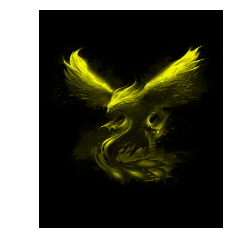

In [ ]:
image_height, image_width, image_num_channels = magenta_phoenix.shape
new_height = image_height * 2
new_width = image_width * 3

# Resize it to 3x the width, and 2x the height, so we expect some distortion. 
# (To display it in the browser, the image is being scaled down anyway, so resizing it 2 x 2 will not be obvious)

bigger_magenta_phoenix = cv2.resize(magenta_phoenix, (new_width, new_height))
print("Resized to image of shape",bigger_magenta_phoenix.shape)
imshow(bigger_magenta_phoenix)

### Writing an Image

The `imwrite` function can write out an image. Let's write out the image we just made, so we can use it later!

In [ ]:
output_path = os.path.join(rootpath, "data", "output_pinkphoenix.png")
cv2.imwrite(output_path, bigger_magenta_phoenix)

True

We should be able to read that image directly from the file. Let's try!

Read file of shape: (2560, 2160, 3) type uint8


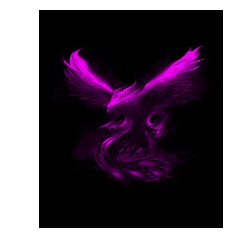

In [ ]:
test_read_output = cv2.imread(output_path)
print("Read file of shape:",test_read_output.shape, "type",test_read_output.dtype)
imshow(test_read_output)

Everything works as expected!

### Working with Video

A video is nothing more than a series of images. We can use the `VideoCapture` object to read videos from webcams, IP cameras, and files. Since we're working in the cloud, we'll use files.

We can use the `VideoWriter` object to write videos to a file. (If you were working locally, you could use `cv2.imshow` to display it in real time)

Let's use what we've learned so far to crop the video!

In [ ]:
# function to crop a given frame
def crop_frame(frame, crop_size):
  # We're given a frame, either gray or RGB, and a crop-size (w,h)
  crop_w, crop_h = crop_size
  # This is an array! We can slice it
  # Take the first pixels along the height, and along the width 
  cropped = frame[:crop_h, :crop_w]
  return cropped

capture = cv2.VideoCapture(os.path.join(rootpath, 'data','sample_video.mp4'))

crop_size = (600, 400) # w,h
output_path = os.path.join(rootpath, 'data','output_cropped.mp4')
# Use the MJPG format
output_format = cv2.VideoWriter_fourcc('M','P','4','V')
output_fps = 30
cropped_output = cv2.VideoWriter(output_path, output_format, output_fps, crop_size)
n = 0
while True:
  successful, next_frame = capture.read()
  if not successful:
    # No more frames to read
    print("Processed %d frames" % n)
    break
  # We have an input frame. Use our function to crop it.
  output_frame = crop_frame(next_frame, crop_size)
  # Write the output frame to the output video
  cropped_output.write(output_frame)
  n += 1
  # Now we have an image! We can process that as we would.

# We have to give up the file at the end.
capture.release()
cropped_output.release()
  

Processed 132 frames


### Display the Video

Unfortunately, it's rather difficult to display videos in Jupyter, so check your google drive!

# Exercises

All of these exercises are doable with the information you've been presented thus far.


## Exercise 1
**Grading students**
The class 6.869 has `num_students` students. Each student has `num_grades` grades, one for each assignment. 
The staff store our grades in a numpy ndarray, of shape `(num_students, num_grades)`. (Each row is a student, each column is an assignment)

**(a)** Create an ndarray of the proper shape to hold the grades table, and fill it with the values `[0, num_students * num_grades)`, going left-to-right, then top-to-bottom.

**(b)** We have a meeting with Julie, whose student index is `2`, and want to see how she's doing in the class. Use ndarray slicing to get an array containing all of her grades (index 2).

**(c)** Xavier wants to know if PSet 4 (assignment index 4) is too hard. Use ndarray slicing to extract the whole classes grades for PSet 4.

In [111]:
num_students = 4
num_assignments = 5

# (a)
grades_table = np.array(range(num_students * num_assignments)).reshape((num_students,num_assignments))
print(grades_table)
# (b)
julies_grades = grades_table[2]
print(julies_grades)
# (c)
pset4_grades = grades_table[:, 4]

pset4_grades

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
[10 11 12 13 14]


array([ 4,  9, 14, 19])

# Exercise 2
**Pose Estimation** The 6.869 staff have developed a ground-breaking pose estimation network. The output of the network is a matrix of shape `(num_keypoints, 3)` (each row is a key point on the body, the columns are X,Y,Z). A "joint" is a connection between two keypoints, expressed as a matrix of shape `(num_joints, 2)`, (each row is a joint, the columns are START_KEYPOINT_INDEX and END_KEYPOINT_INDEX).

**(a)** Create a matrix of joint starts, and another matrix of joint ends, each of shape `(num_joints, 3)`. The starts table should contain the position of the start of each joint (according to `position`)  

**(b)** Create a matrix of joint-displacements, of shape `(num_joints, 3)`. Each row represents a joint. The columns should be the difference in X, Y, and Z between the start of the joint, and the end of the joint, respectively `(endX - startX, endY - startY, endZ-startZ)`. 

**(c)** Find the magnitude (length) of each of these displacement vectors, and output the results in an array of length `num_joints`


In [ ]:
num_keypoints = 7
num_joints = 5


# All Z's in one plane, but makes it easier to see XYZ vs Start/end
keypoint_positions = np.array(
    [
        [0, 1, 0], #Head
        [0, 0, 0], #Torso
        [1, 0, 0], #Right Arm
        [-1, 0, 0], #Left Arm
        [0, -1, 0], #Lower ,Torso
        [1, -2, 0], #Right Leg
        [-1, -2, 0] #Left Leg
    ]
)

#   O
#  _|_
#   |
#  /\
joints = np.array([
    # Head to torso
    [0, 1],
    # Torso to Right arm
    [1, 2],
    # Torso to Left Arm
    [1, 3],
    # Torso to Lower Torso
    [3, 4],
    # Lower Torso to Right Leg
    [4, 5],
    # Lower Torso to Left Leg
    [4, 6]
])

# (a)
starts = keypoint_positions[joints[:, 0]]
ends = keypoint_positions[joints[:, 1]]
print(joints[:, 0])
print(f'starts={starts},\nends={ends}')
# (b)
diffs = ends - starts
print(f'diffs = {diffs}')
# (c)
lengths = np.sum(diffs ** 2,axis=1) ** 0.5
print(np.sum(diffs ** 2,axis=1))
lengths


[0 1 1 3 4 4]
starts=[[ 0  1  0]
 [ 0  0  0]
 [ 0  0  0]
 [-1  0  0]
 [ 0 -1  0]
 [ 0 -1  0]],
ends=[[ 0  0  0]
 [ 1  0  0]
 [-1  0  0]
 [ 0 -1  0]
 [ 1 -2  0]
 [-1 -2  0]]
diffs = [[ 0 -1  0]
 [ 1  0  0]
 [-1  0  0]
 [ 1 -1  0]
 [ 1 -1  0]
 [-1 -1  0]]
[1 1 1 2 2 2]


array([1.        , 1.        , 1.        , 1.41421356, 1.41421356,
       1.41421356])

# Exercise 3

**Edge detection** Our phoenix is lovely and bright - but what if we wanted to draw it? it might help to have the edges.

**(a)** Load the image `phoenix.jpg`. Covert it to grayscale. \
**(b)** Use the scipy.signal.convolve2d (aliased as `conv2d`) to compute the convolution of the phoenix and the `kernel` (make sure to cast to a float32 between 0 and 1 first). Use imshow to show the results. Use `prep_to_draw` to convert a [0,1] BW image to a drawable image.

In [ ]:
import scipy
import scipy.signal

conv2d = scipy.signal.convolve2d
# looks for horizontal edges
horizontal_edge_detector = np.array(
  [
      [-1, 0, 1]
  ]
)

box_blur_size = 15
box_blur = np.ones((box_blur_size, box_blur_size)) / (box_blur_size ** 2)
sharpen_kernel = np.array(
    [
        [0, -1, 0],
        [-1, 5, -1],
        [0,  -1, 0]
    ]
)

all_edge_detector = np.array(
    [
        [0, -1, 0],
        [-1, 4, -1],
        [0,  -1, 0]
    ]
)



def prep_to_draw(img):
  # Scale to 0,255
  prepped = img * 255
  # Clamp to [0, 255]
  prepped[prepped < 0] = 0.0
  prepped[prepped > 255] = 255.0
  prepped = prepped.astype(np.uint8)
  return prepped

'''
SOLUTION:
'''


phoenix_image = cv2.imread(os.path.join(rootpath, "data","phoenix.jpg"))
bw = cv2.cvtColor(phoenix_image, cv2.COLOR_BGR2GRAY)
bw_norm = (bw / 255.0).astype(np.float32)
edges = conv2d(bw_norm, horizontal_edge_detector)
blurred = conv2d(bw_norm, box_blur)
sharpened = conv2d(blurred, sharpen_kernel)
# Apply a second time for greater effect
sharpened = conv2d(sharpened, sharpen_kernel)
# Feel free to try convolving with other kernels! I've added a few I like to the top.
print("Black and white image")
imshow(prep_to_draw(bw_norm))
print("Edges")
imshow(prep_to_draw(edges))
print("Box-blurred")
imshow(prep_to_draw(blurred))
print("Sharpen of blurred img")
imshow(prep_to_draw(sharpened))

#imshow(normed)

NameError: ignored